In [11]:
import pandas as pd
import numpy as np

df = pd.read_csv('titanic.csv')

## Basic df inspection

In [12]:
df.shape

(891, 12)

In [13]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [20]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# Titanic Dataset Exploratory Data Analysis

Let's explore the Titanic dataset through various statistical analyses and visualizations.

In [22]:
# Import additional required libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_palette('husl')

## Basic Statistical Analysis

In [23]:
# Display basic information about the dataset
print('Dataset Info:')
df.info()

print('\nBasic Statistics:')
print(df.describe())

print('\nSurvival Rate:')
print(df['Survived'].value_counts(normalize=True))

print('\nGender Distribution:')
print(df['Sex'].value_counts())

print('\nPassenger Class Distribution:')
print(df['Pclass'].value_counts())

print('\nEmbarkation Port Distribution:')
print(df['Embarked'].value_counts())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Basic Statistics:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
s

## Data Visualization

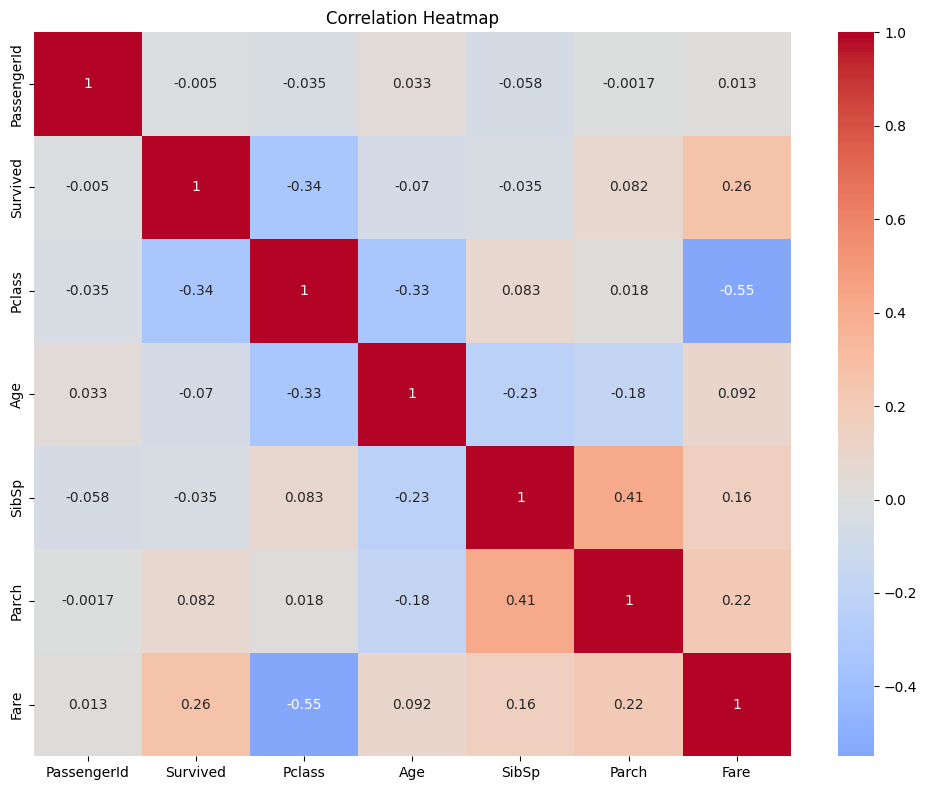

In [24]:
# Create correlation heatmap
plt.figure(figsize=(10, 8))
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

### Observations from Correlation Heatmap
- Strong positive correlation between Fare and Pclass (higher class = higher fare).
- Moderate positive correlation between Survival and Sex (being female increased survival chances).
- Weak positive correlation between Survival and Fare.
- Weak negative correlation between Survival and Pclass (lower class = lower survival rate).

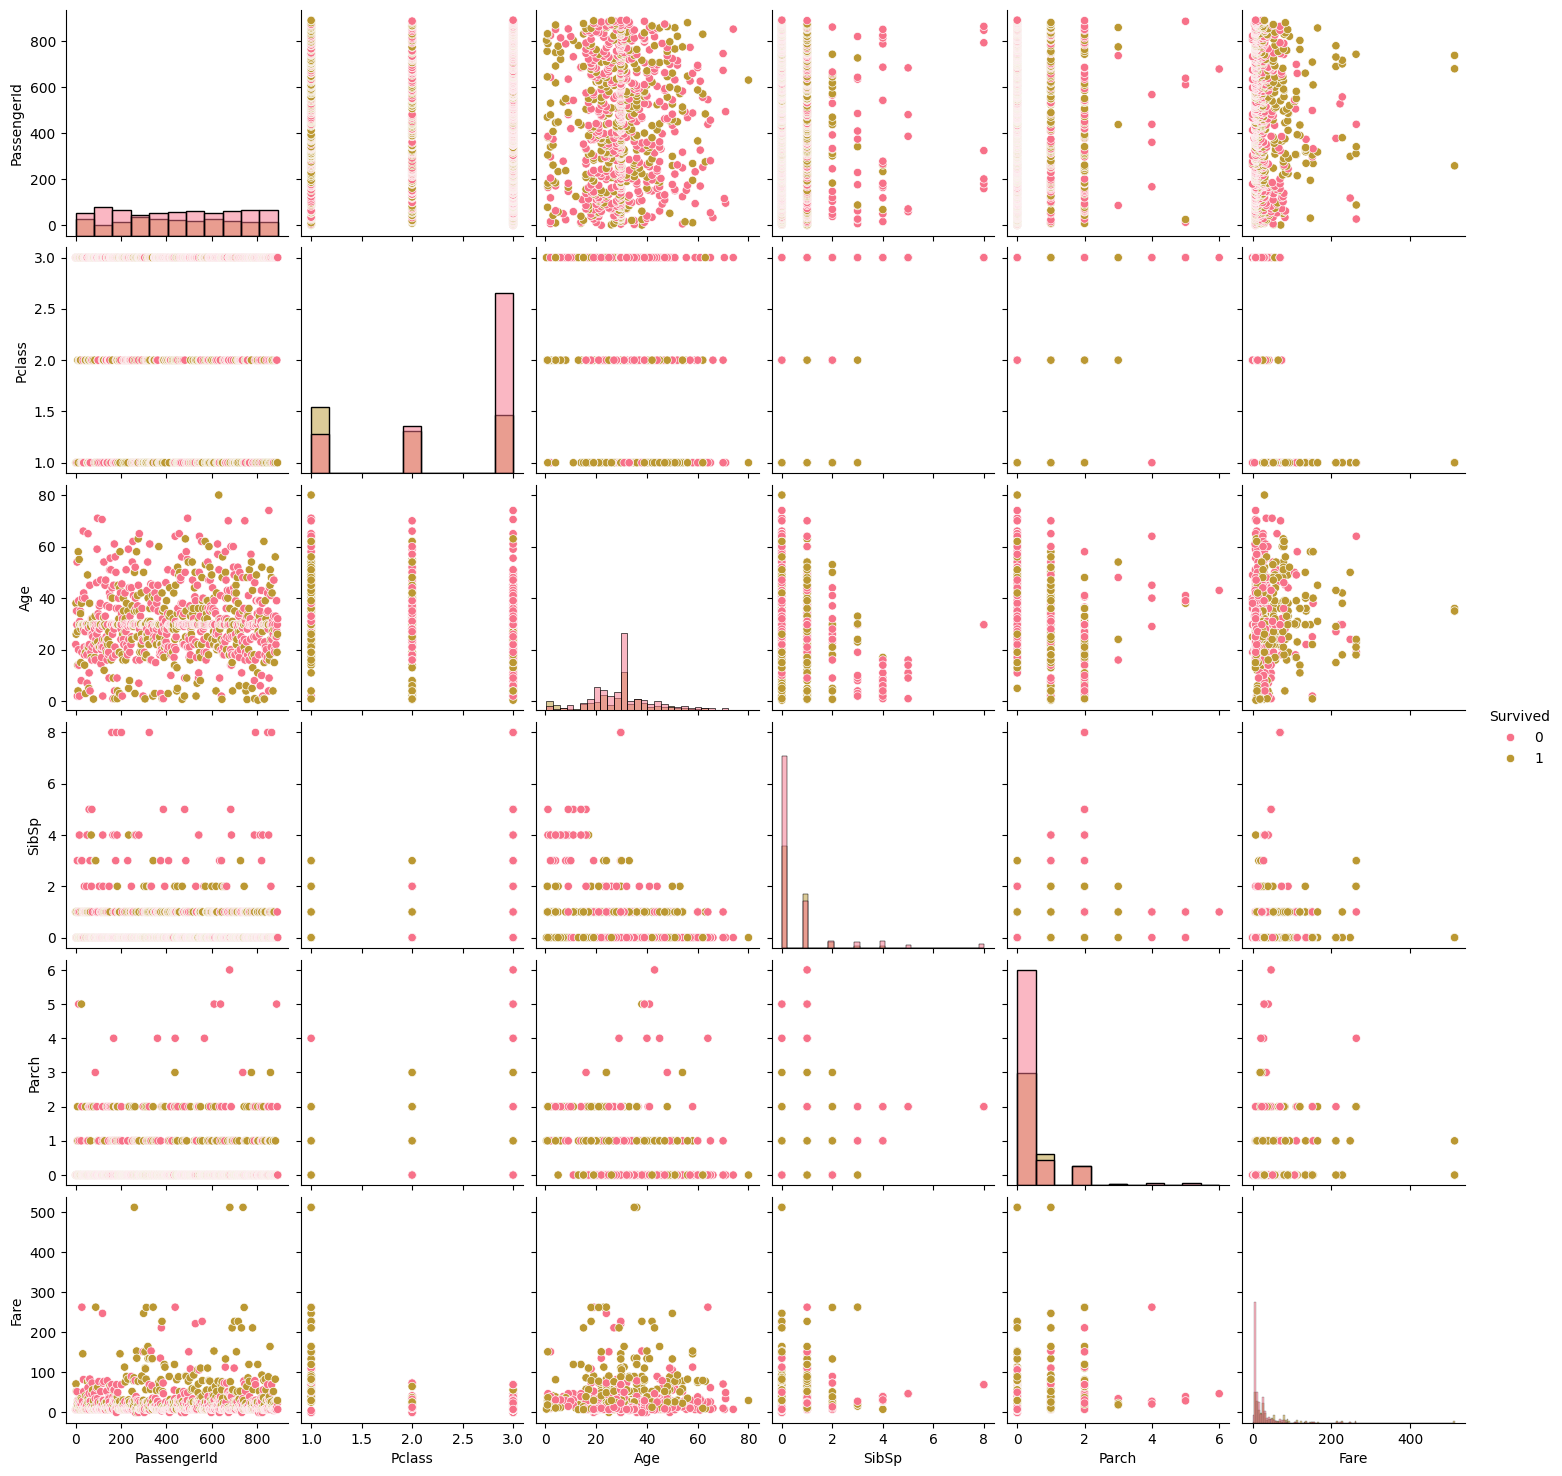

In [25]:
# Create pairplot for numeric variables
sns.pairplot(df, hue='Survived', diag_kind='hist')
plt.show()

### Observations from Pairplot
- Clear separation in survival rates based on Fare and Pclass.
- Survivors tend to have higher fares and belong to higher classes.
- Age distribution shows that younger passengers had better survival rates.

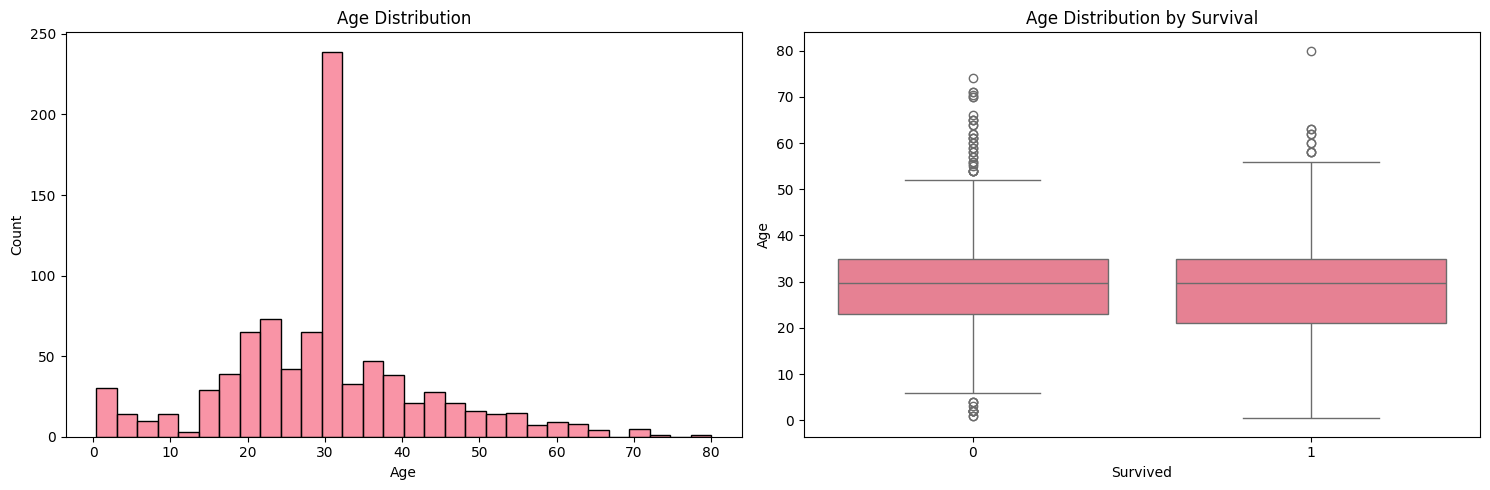

In [26]:
# Age distribution
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Age', bins=30)
plt.title('Age Distribution')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Survived', y='Age')
plt.title('Age Distribution by Survival')

plt.tight_layout()
plt.show()

### Observations from Age Distribution
- Most passengers were between 20-40 years old.
- Children (younger passengers) had higher survival rates compared to adults.
- Age distribution is slightly right-skewed.

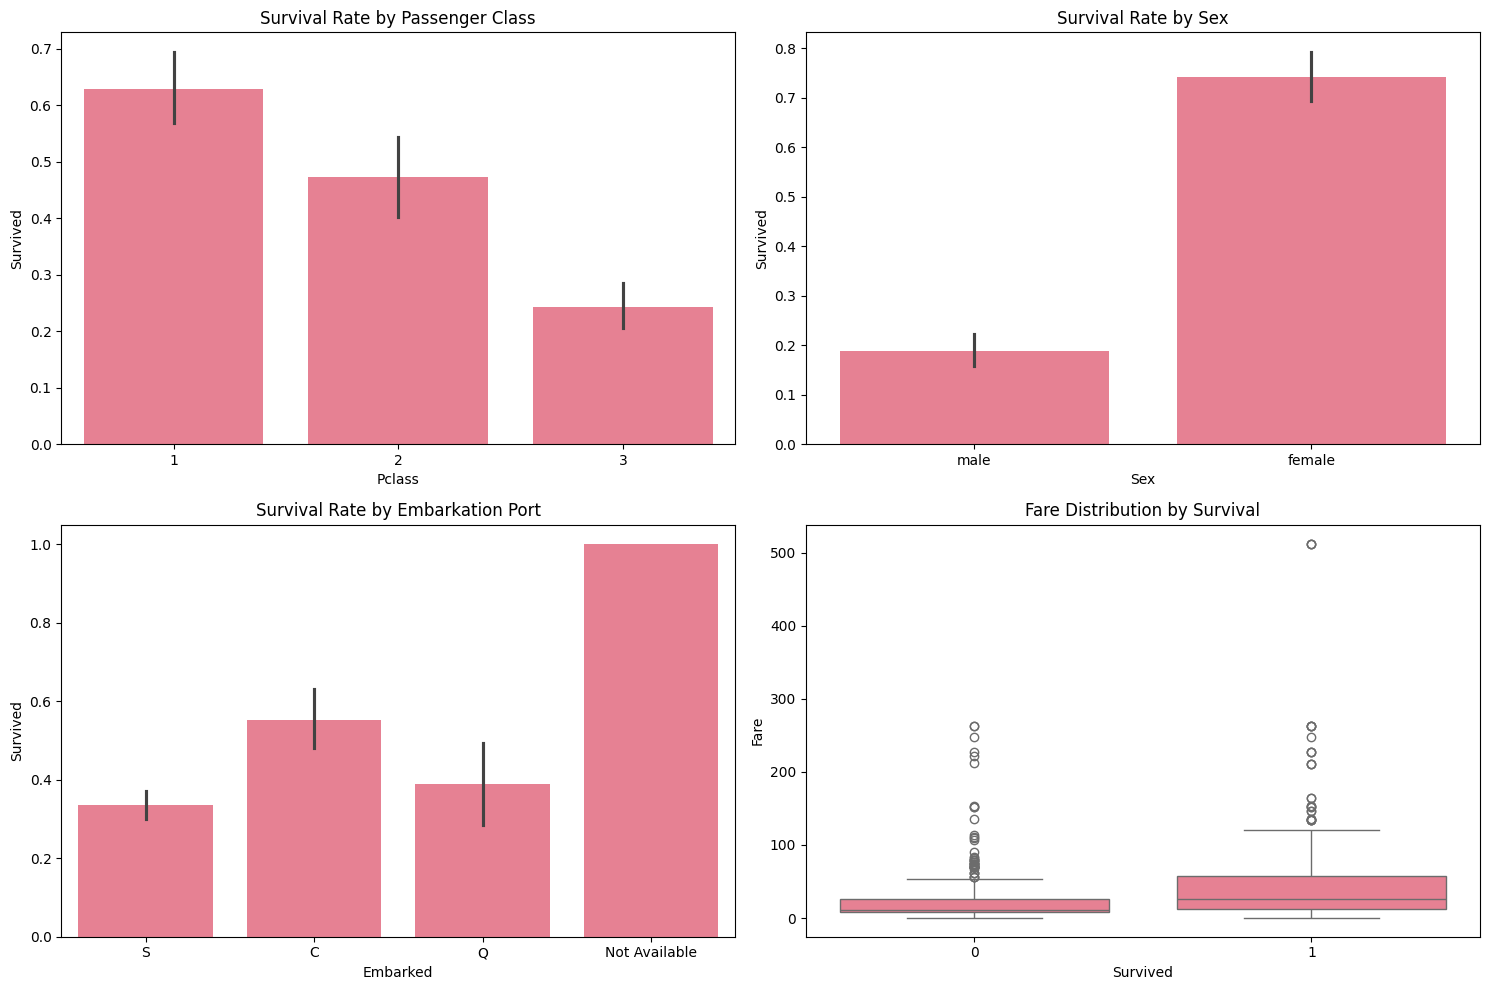

In [27]:
# Survival analysis by different features
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Survival by Class
sns.barplot(data=df, x='Pclass', y='Survived', ax=axes[0,0])
axes[0,0].set_title('Survival Rate by Passenger Class')

# Survival by Sex
sns.barplot(data=df, x='Sex', y='Survived', ax=axes[0,1])
axes[0,1].set_title('Survival Rate by Sex')

# Survival by Embarked
sns.barplot(data=df, x='Embarked', y='Survived', ax=axes[1,0])
axes[1,0].set_title('Survival Rate by Embarkation Port')

# Fare distribution
sns.boxplot(data=df, x='Survived', y='Fare', ax=axes[1,1])
axes[1,1].set_title('Fare Distribution by Survival')

plt.tight_layout()
plt.show()

### Observations from Survival Analysis
- **By Class**: 1st class had the highest survival rate (~63%), followed by 2nd class (~47%), and 3rd class (~24%).
- **By Gender**: Females had a much higher survival rate (~74%) compared to males (~19%).
- **By Embarkation Port**: Passengers from Cherbourg (C) had the highest survival rate, while Southampton (S) and Queenstown (Q) had lower survival rates.
- **By Fare**: Survivors generally paid higher fares, indicating a correlation between fare amount and survival probability.